In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
jdf = pd.read_csv("Jamboree_Admission.csv")
jdf

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
def min_max(col):
    print(jdf[col].min(), "->", jdf[col].max())

In [4]:
jdf = jdf.drop(["Serial No."], axis="columns")
jdf

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
print("Ranges")
for col in jdf.columns:
    print(col, ":", end=" ")
    min_max(col)

Ranges
GRE Score : 290 -> 340
TOEFL Score : 92 -> 120
University Rating : 1 -> 5
SOP : 1.0 -> 5.0
LOR  : 1.0 -> 5.0
CGPA : 6.8 -> 9.92
Research : 0 -> 1
Chance of Admit  : 0.34 -> 0.97


In [6]:
jdf.shape

(500, 8)

In [7]:
jdf.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
jdf.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
# rename certain cols to remove spaces
cols = list(jdf.columns)
for col in cols:
    jdf.rename({col: col.strip()}, inplace=True, axis=1)

In [10]:
jdf.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

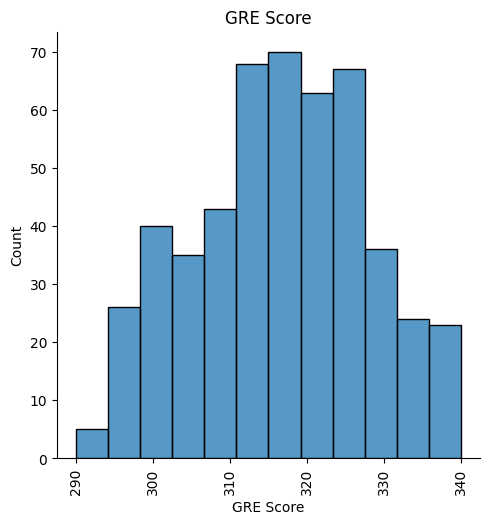

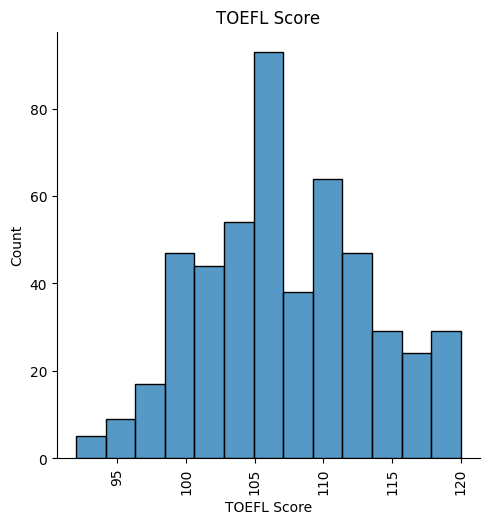

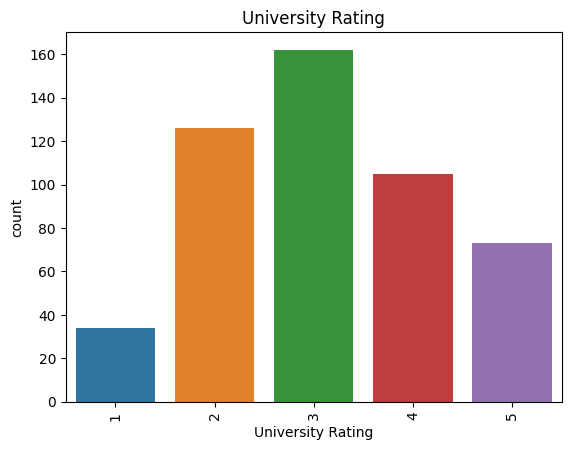

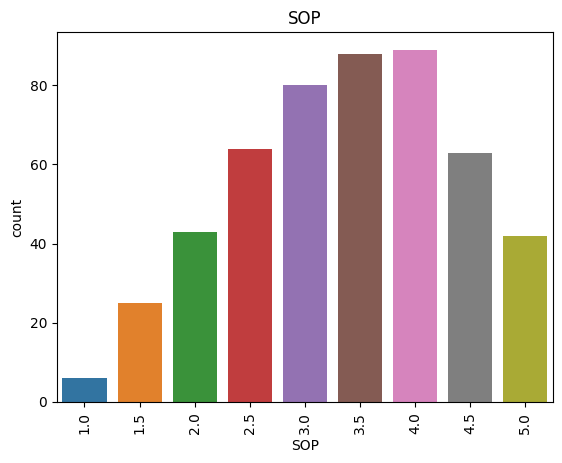

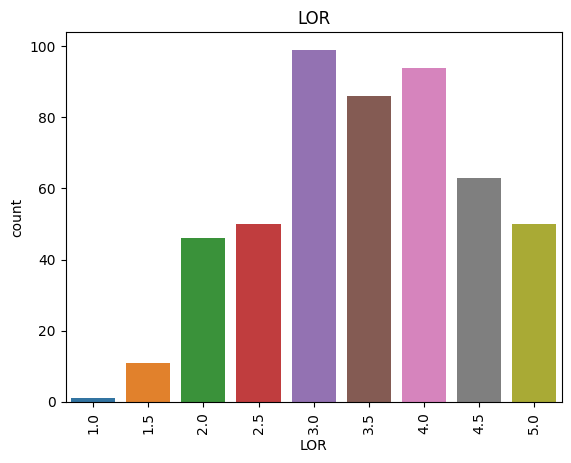

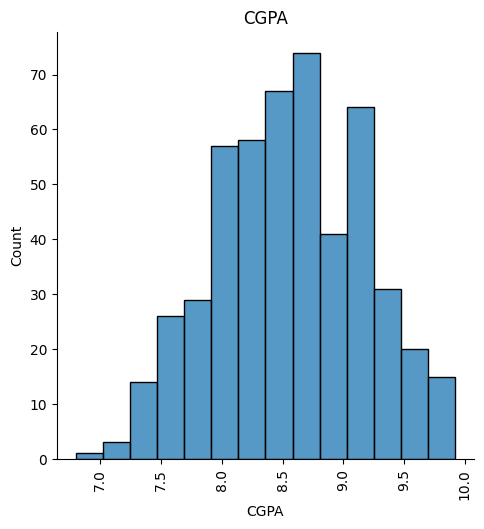

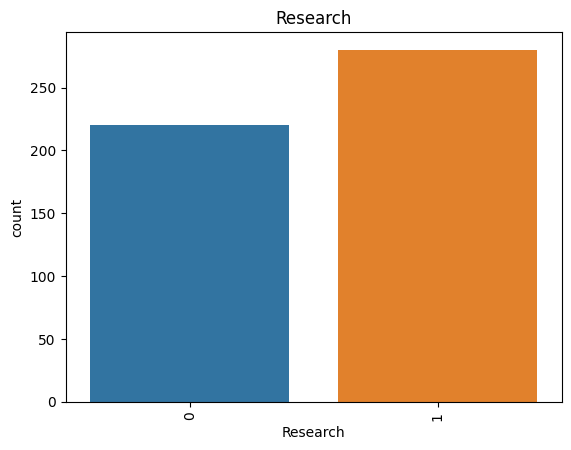

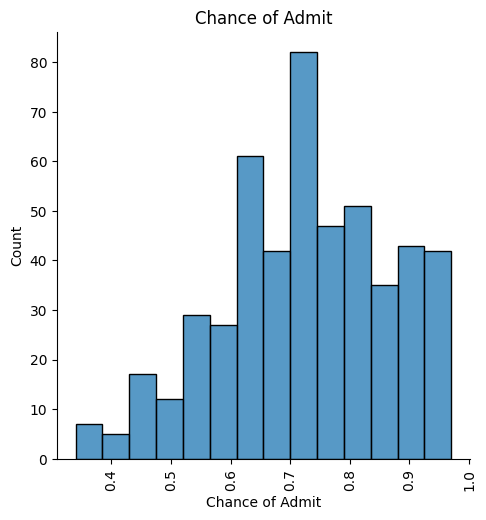

In [11]:
# univariate analysis

categorical_cols = ["University Rating", "SOP", "LOR", "Research"]
for col in jdf.columns:
    if col not in categorical_cols:
        sns.displot(jdf[col])
    else:
        sns.countplot(x=jdf[col])
    plt.title(col)
    plt.xticks(rotation=90)
    plt.show()

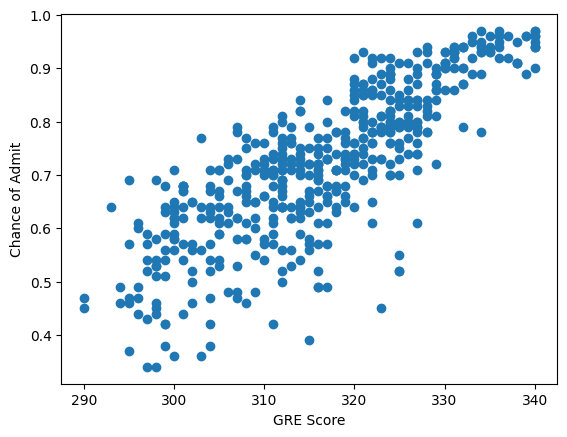

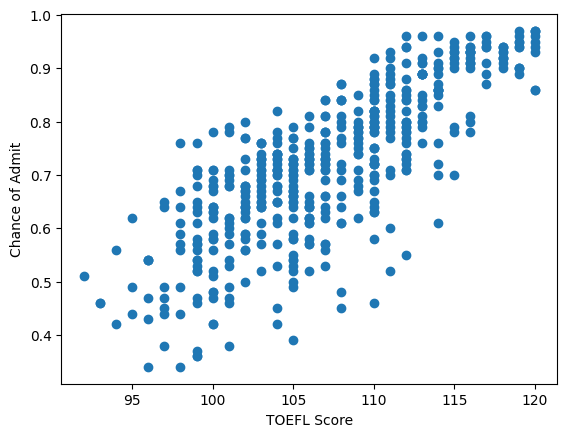

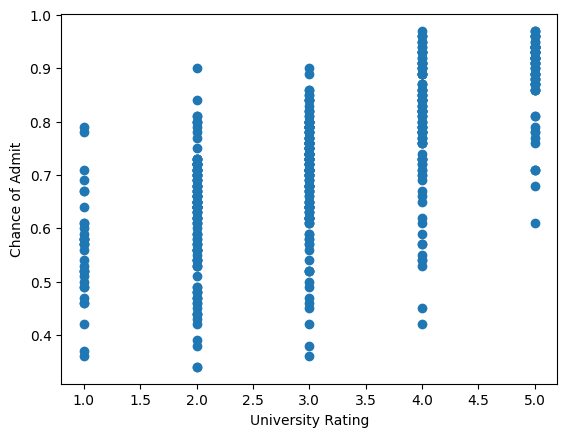

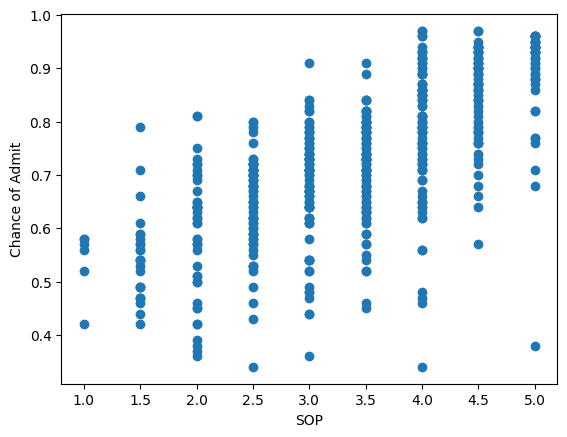

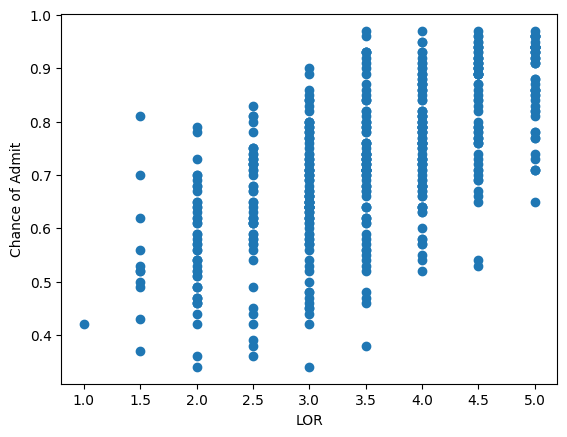

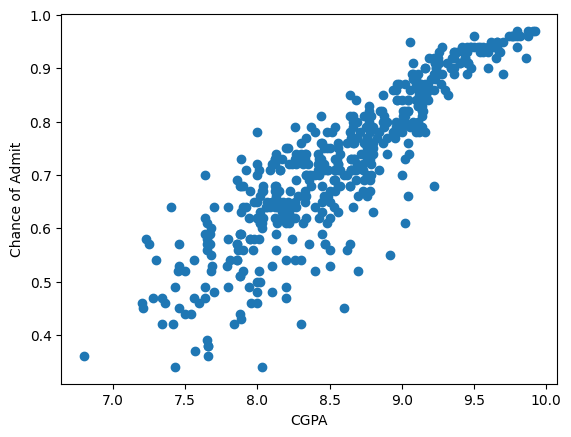

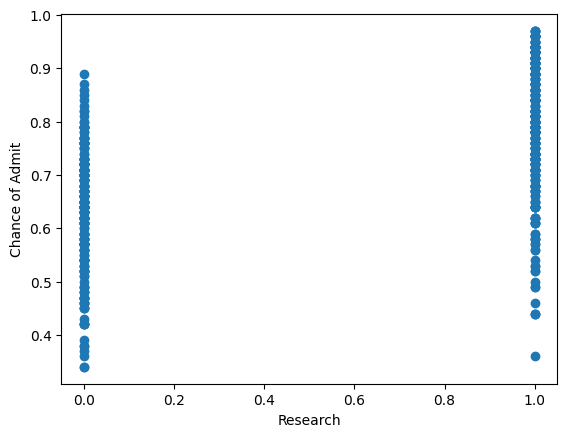

In [12]:
# see relation of each feature with the target
# bivariate analysis

target = "Chance of Admit"
for col in jdf.columns:
    if col != target:
        plt.figure()
        plt.xlabel(col)
        plt.ylabel(target)
        plt.scatter(jdf[col], jdf[target])

In [13]:
jdf

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [14]:
jdf.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [15]:
jdf.duplicated().sum()

0

In [16]:
jdf.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

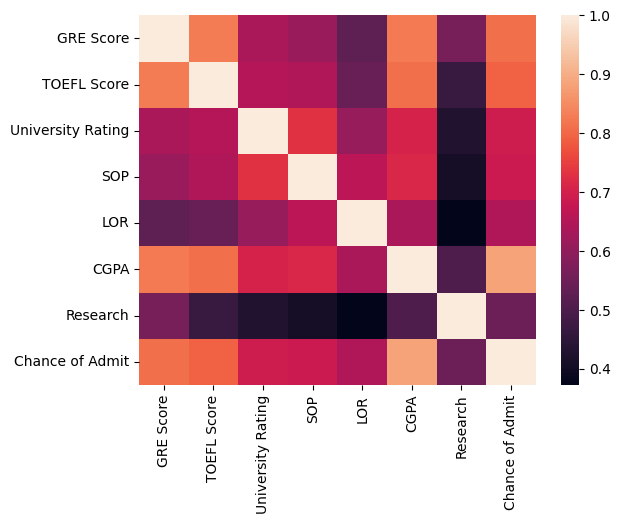

In [17]:
sns.heatmap(jdf.corr())

In [18]:
jdf.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
def split_feature_target(df):
    l = df.shape[1] - 1
    X = df.iloc[:, :l]
    y = df.iloc[:, l]
    return X, y

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model


def make_linear_regressor(X, y):
    # split the availaible data into training and test set
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=100, test_size=0.25, shuffle=True
    )
    # make object of LinearRegression
    linear_regressor = linear_model.LinearRegression()
    # fit training dta
    linear_regressor.fit(X_train, y_train)
    print("Fitting done! Model created")
    print("Coefficents: ", linear_regressor.coef_)
    print("Intercept: ", linear_regressor.intercept_)
    print("Score: ", linear_regressor.score(X_test, y_test))
    # finally return the fitted regression model
    return linear_regressor, X_train, X_test, y_train, y_test

In [21]:
def analyze_model(linear_regressor, X_test, y_test, X_train):
    # get predicted values
    print("Calculating various metrics for LinearRegression model\n")
    y_predicted = linear_regressor.predict(X_test)
    # calculation of the different metrics of the linear model
    # r2 score
    r2 = r2_score(y_test, y_predicted)
    print("R2 Score: ", r2)
    # MAE
    mae = mean_absolute_error(y_test, y_predicted)
    print("MAE: ", mae)
    # MSE
    mse = mean_squared_error(y_test, y_predicted)
    print("MSE: ", mse)
    # rmse
    rmse = mean_squared_error(y_test, y_predicted, squared=False)
    print("RMSE: ", rmse)
    N = X_train.shape[0]
    print("Size of training data set: ", N)
    p = X_train.shape[1]  # feature count
    print("No of Features: ", p)
    nr = (1 - r2) * (N - 1)
    dr = N - p - 1
    adjusted_r2 = 1 - nr / dr
    print("Adjusted R2 Score: ", adjusted_r2)

In [22]:
X, y = split_feature_target(jdf)
linear_regressor, X_train, X_test, y_train, y_test = make_linear_regressor(X, y)

Fitting done! Model created
Coefficents:  [0.00135642 0.00329941 0.00411755 0.00285842 0.0180535  0.12443146
 0.02731803]
Intercept:  -1.2325706368448297
Score:  0.829103539029981


In [23]:
analyze_model(linear_regressor, X_test, y_test, X_train)

Calculating various metrics for LinearRegression model

R2 Score:  0.829103539029981
MAE:  0.04530373166091877
MSE:  0.003347586595459093
RMSE:  0.057858332117847064
Size of training data set:  375
No of Features:  7
Adjusted R2 Score:  0.8258439335073922


In [24]:
new_jdf = jdf.drop(["TOEFL Score"], axis=1)

In [25]:
new_jdf.head()

,GRE Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,4,4.5,4.5,9.65,1,0.92
1,324,4,4.0,4.5,8.87,1,0.76
2,316,3,3.0,3.5,8.00,1,0.72
3,322,3,3.5,2.5,8.67,1,0.80
4,314,2,2.0,3.0,8.21,0,0.65


In [26]:
new_jdf.describe()

,GRE Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [27]:
nX, ny = split_feature_target(new_jdf)
nlinear_regressor, nX_train, nX_test, ny_train, ny_test = make_linear_regressor(nX, ny)

Fitting done! Model created
Coefficents:  [0.00226174 0.00558432 0.00383664 0.0188624  0.13329704 0.02688337]
Intercept:  -1.2518589803683966
Score:  0.830719037877036


In [48]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_regressor = Ridge(alpha=14)
ridge_regressor.fit(X_train, y_train)
ridge_regressor.score(X_test, y_test)

0.8318777892376548

In [45]:
lasso_regressor = Lasso(alpha=0.001)
lasso_regressor.fit(X_train, y_train)
lasso_regressor.score(X_test, y_test)

0.8327072065574155

In [55]:
enet_regressor = ElasticNet(alpha=0.001)
enet_regressor.fit(X_train, y_train)
enet_regressor.score(X_test, y_test)

0.8313546459994925

In [ ]:
#  observation: ridge, lassor and elastic net regression has no signifant effect on improving the score
# now lets try polynomial regression

## Polynomial Regression

In [58]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 1
for degree in range(1, 10):
    polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polyreg.fit(X_train, y_train)
    score = polyreg.score(X_test, y_test)
    print("Polynomial Regression of degree:", degree, " Score:", score)
    polyreg_scaled = make_pipeline(
        PolynomialFeatures(degree), StandardScaler(), LinearRegression()
    )
    polyreg_scaled.fit(X_train, y_train)
    sscore = polyreg_scaled.score(X_test, y_test)
    print("SCALED Polynomial Regression of degree:", degree, " Score:", sscore)

Polynomial Regression of degree: 1  Score: 0.8291035390299808
SCALED Polynomial Regression of degree: 1  Score: 0.8291035390299811
Polynomial Regression of degree: 2  Score: 0.8072767023617194
SCALED Polynomial Regression of degree: 2  Score: 0.8072767023617344
Polynomial Regression of degree: 3  Score: 0.6272377887714711
SCALED Polynomial Regression of degree: 3  Score: -2.0761228435400088
Polynomial Regression of degree: 4  Score: -17.267936171096782
SCALED Polynomial Regression of degree: 4  Score: -12.368280165248903
Polynomial Regression of degree: 5  Score: -742.0837275236527
SCALED Polynomial Regression of degree: 5  Score: -745.3049719258847
Polynomial Regression of degree: 6  Score: -333.11014608710434
SCALED Polynomial Regression of degree: 6  Score: -554.0250478778094
Polynomial Regression of degree: 7  Score: -343.44589842592495
SCALED Polynomial Regression of degree: 7  Score: -549.5365646808799
Polynomial Regression of degree: 8  Score: -326.19913044961186
SCALED Polynomi

A negative R² score means that you would be better off using "constant regression", that is having your prediction be always equal to the mean of y . 

## Final Comments